In [1]:
from utils import DeepWalk

import networkx as nx
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from matplotlib import pyplot as plt

### Vanilla DeepWalk on Karate Club graph to test the plausibility of DeepWalk implementation 

In [2]:
G = nx.karate_club_graph()

In [23]:
model = DeepWalk(G, 
                 20, 
                 64, 
                 100, 
                 30, 
                 0.025, 
                 None, 
                 None, 
                 None, 
                 None, 
                 False)

In [24]:
model.train()

In [59]:
club_colors = {
    'Mr. Hi': 'green',
    'Officer': 'red'
}

node_colors = [club_colors[G.nodes[node]['club']] for node in G.nodes]

pos = nx.spring_layout(G)  

pca = PCA(n_components=2)
principal_components = pca.fit_transform(model.Phi)

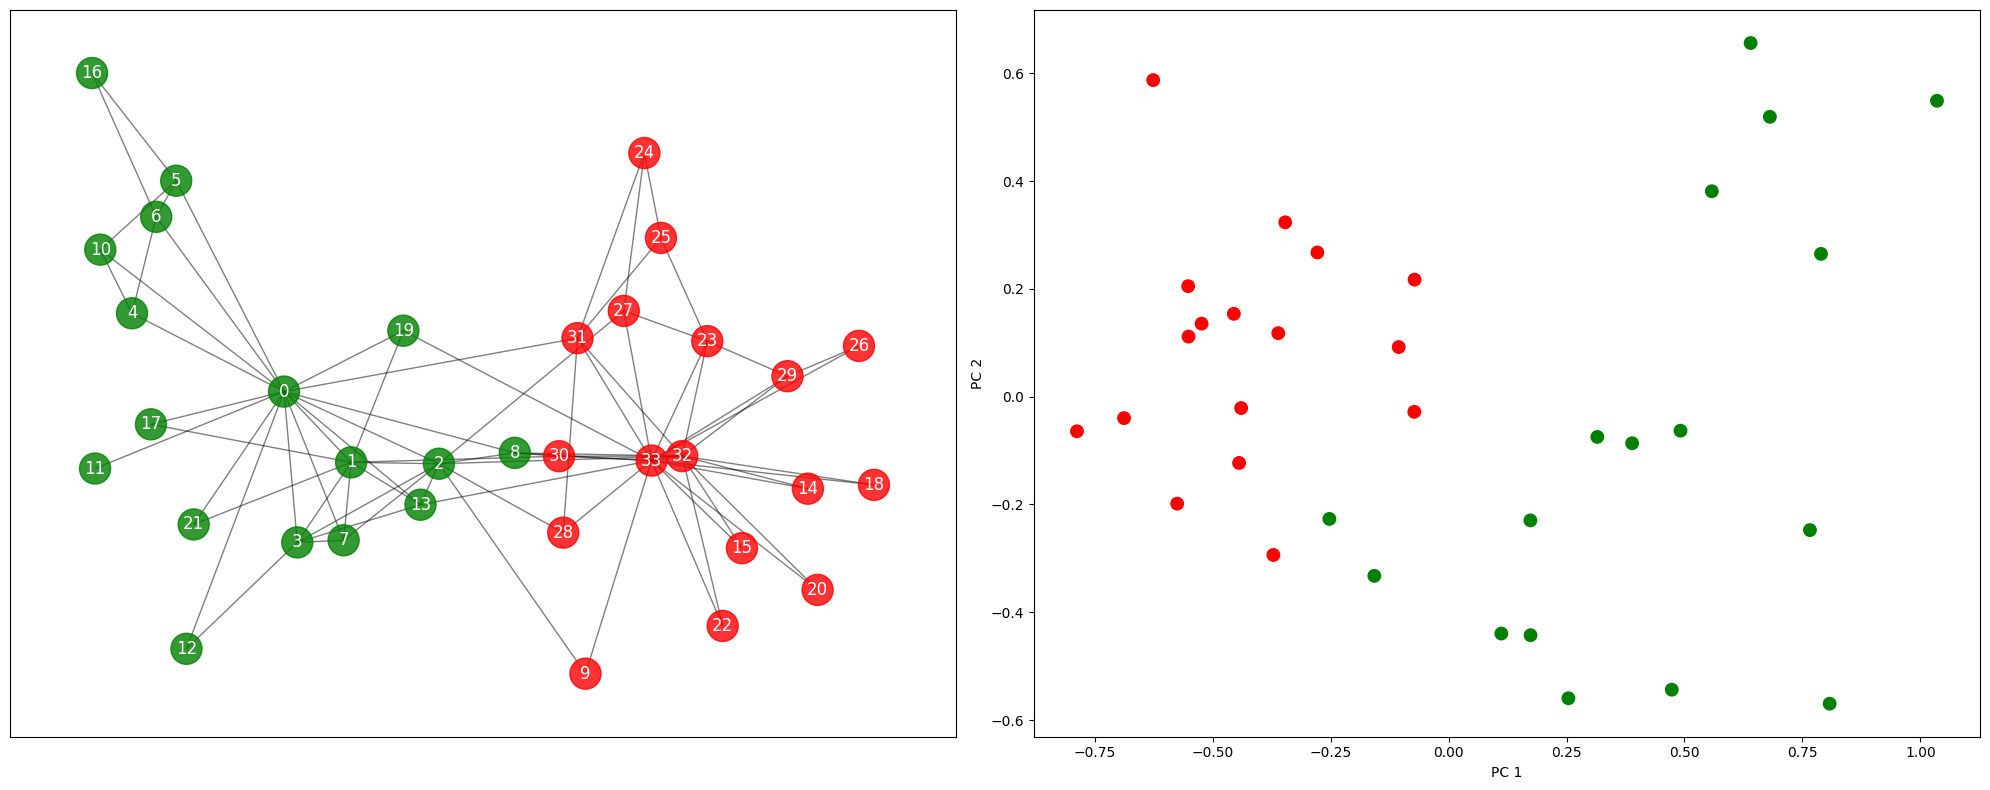

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8, ax=axes[0])
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, ax=axes[0])
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', ax=axes[0])

axes[1].scatter(principal_components[:,0], 
                principal_components[:,1],
                s=80, 
                color=node_colors)

axes[1].set_xlabel('PC 1')
axes[1].set_ylabel('PC 2')

plt.tight_layout()
plt.show()

_______________________

### A first test: building the sheaf out of PubMed and running DeepTransport

In [1]:
pip install dgl

  Obtaining dependency information for dgl from https://files.pythonhosted.org/packages/52/fc/f01a076131bbe7de3040d5322325b023b8bb840ab25de7cf96eb92f047c5/dgl-2.2.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchdata>=0.5.0 from https://files.pythonhosted.org/packages/0e/06/0c916f27ef9f5a566b555f07c82c94fb9277fcabe0fcbf4dfe4505dcb28a/torchdata-0.7.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torch>=2 from https://files.pythonhosted.org/packages/2e/f7/503bab04f4e7a0a43f2ff05c3635cee9dfcf2e09656020d29502b87a94a3/torch-2.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466f0ea8d48ce9efae39bd2ff38cebf8dce61259/mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-openmp==2021.* from https://files.pythonhosted.org/packages/6f/21/b590c0cc3888b24f2ac9898c41d852d7454a16

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.0+cu117 requires torch==1.13.0, but you have torch 2.3.0 which is incompatible.
torchvision 0.14.0 requires torch==1.13.0, but you have torch 2.3.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import dgl
from dgl.data import AmazonCoBuyComputerDataset

In [3]:
data = AmazonCoBuyComputerDataset()
g = data[0]
num_class = data.num_classes
feat = g.ndata['feat']  # get node feature
label = g.ndata['label']  # get node labels

In [4]:
src, dst = g.edges()
edges = list(zip(src.tolist(), dst.tolist()))

In [6]:
feat.shape

torch.Size([13752, 767])

In [7]:
from utils import GraphSheaf

In [ ]:
F = GraphSheaf(None, 
               np.arange(0,feat.shape[0]),
               edges,
               feat.shape[1],
               feat,
               0.01)